# 0. Importing packages

In [1]:
# Load the autoreload extension to automatically reload modules before executing code (to avoid restarting the kernel)
%load_ext autoreload 
# NB. uncomment the line above first time you run this cell
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

from resources.network_functions import NetworkEdgeListConstructor, GraphConstructor, NetworkVisualizer

## 0.1 File Paths

In [2]:
# File paths
import resources.filepaths as fp

fp_main = fp.fp_main
fp_main_output = fp.fp_main_output

# To output data that has to go to external s-drive
fp_main_external = fp.fp_main_external
fp_output_external = fp.fp_output_external

# 1 Load in data

In [3]:
# Read in the data
github_data = pd.read_parquet(fp_output_external / 'final_dataset.gzip.parquet')

## 1.1 Construct network edgelists for attention, collaboration and combined

In [4]:
constructor = NetworkEdgeListConstructor(github_data)
all_edges_user_level, attention_edges_user_level, collaboration_edges_user_level = constructor.get_edge_lists()
print(f'Number of edges in the user-level network: {len(all_edges_user_level)}')
print(f'Number of attention edges in the user-level network: {len(attention_edges_user_level)}')
print(f'Number of collaboration edges in the user-level network: {len(collaboration_edges_user_level)}')

# Save the edgelist using gzip parquet
all_edges_user_level.to_parquet(fp_output_external / 'all_edges_user_level.gzip.parquet')
attention_edges_user_level.to_parquet(fp_output_external / 'attention_edges_user_level.gzip.parquet')
collaboration_edges_user_level.to_parquet(fp_output_external / 'collaboration_edges_user_level.gzip.parquet')

Number of edges in the user-level network: 1228
Number of attention edges in the user-level network: 1200
Number of collaboration edges in the user-level network: 28


## 1.2 Construct graphs for attention and collaboration for vizualisation

In [5]:
gc_attention = GraphConstructor(all_edges_user_level, graph_type='attention')
attention_graph = gc_attention.get_graph()
print("Attention Graph edges:", attention_graph.edges())

gc_collaboration = GraphConstructor(all_edges_user_level, graph_type='collaboration')
collaboration_graph = gc_collaboration.get_graph()
print('\nCollaboration Graph edges:', collaboration_graph.edges())

Attention Graph edges: [('signifly', 'signifly'), ('uptime', 'uptime'), ('holion', 'holion'), ('shape', 'shape'), ('charlie tango', 'charlie tango'), ('charlie tango', 'signifly'), ('systematic', 'systematic'), ('kruso', 'kruso'), ('trifork', 'trifork'), ('must', 'must'), ('eg a s', 'eg a s'), ('ffw', 'ffw'), ('abtion', 'abtion'), ('abtion', 'oxygen'), ('capgemini', 'capgemini'), ('oxygen', 'abtion'), ('oxygen', 'oxygen'), ('netcompany', 'netcompany')]

Collaboration Graph edges: [('signifly', 'signifly'), ('uptime', 'uptime'), ('shape', 'shape'), ('trifork', 'trifork'), ('must', 'must'), ('eg a s', 'eg a s'), ('abtion', 'abtion'), ('netcompany', 'netcompany')]


# 2 Visualize attention and collaboration networks

Plotting Collaboration Graph
Plot saved as collaboration_graph.png


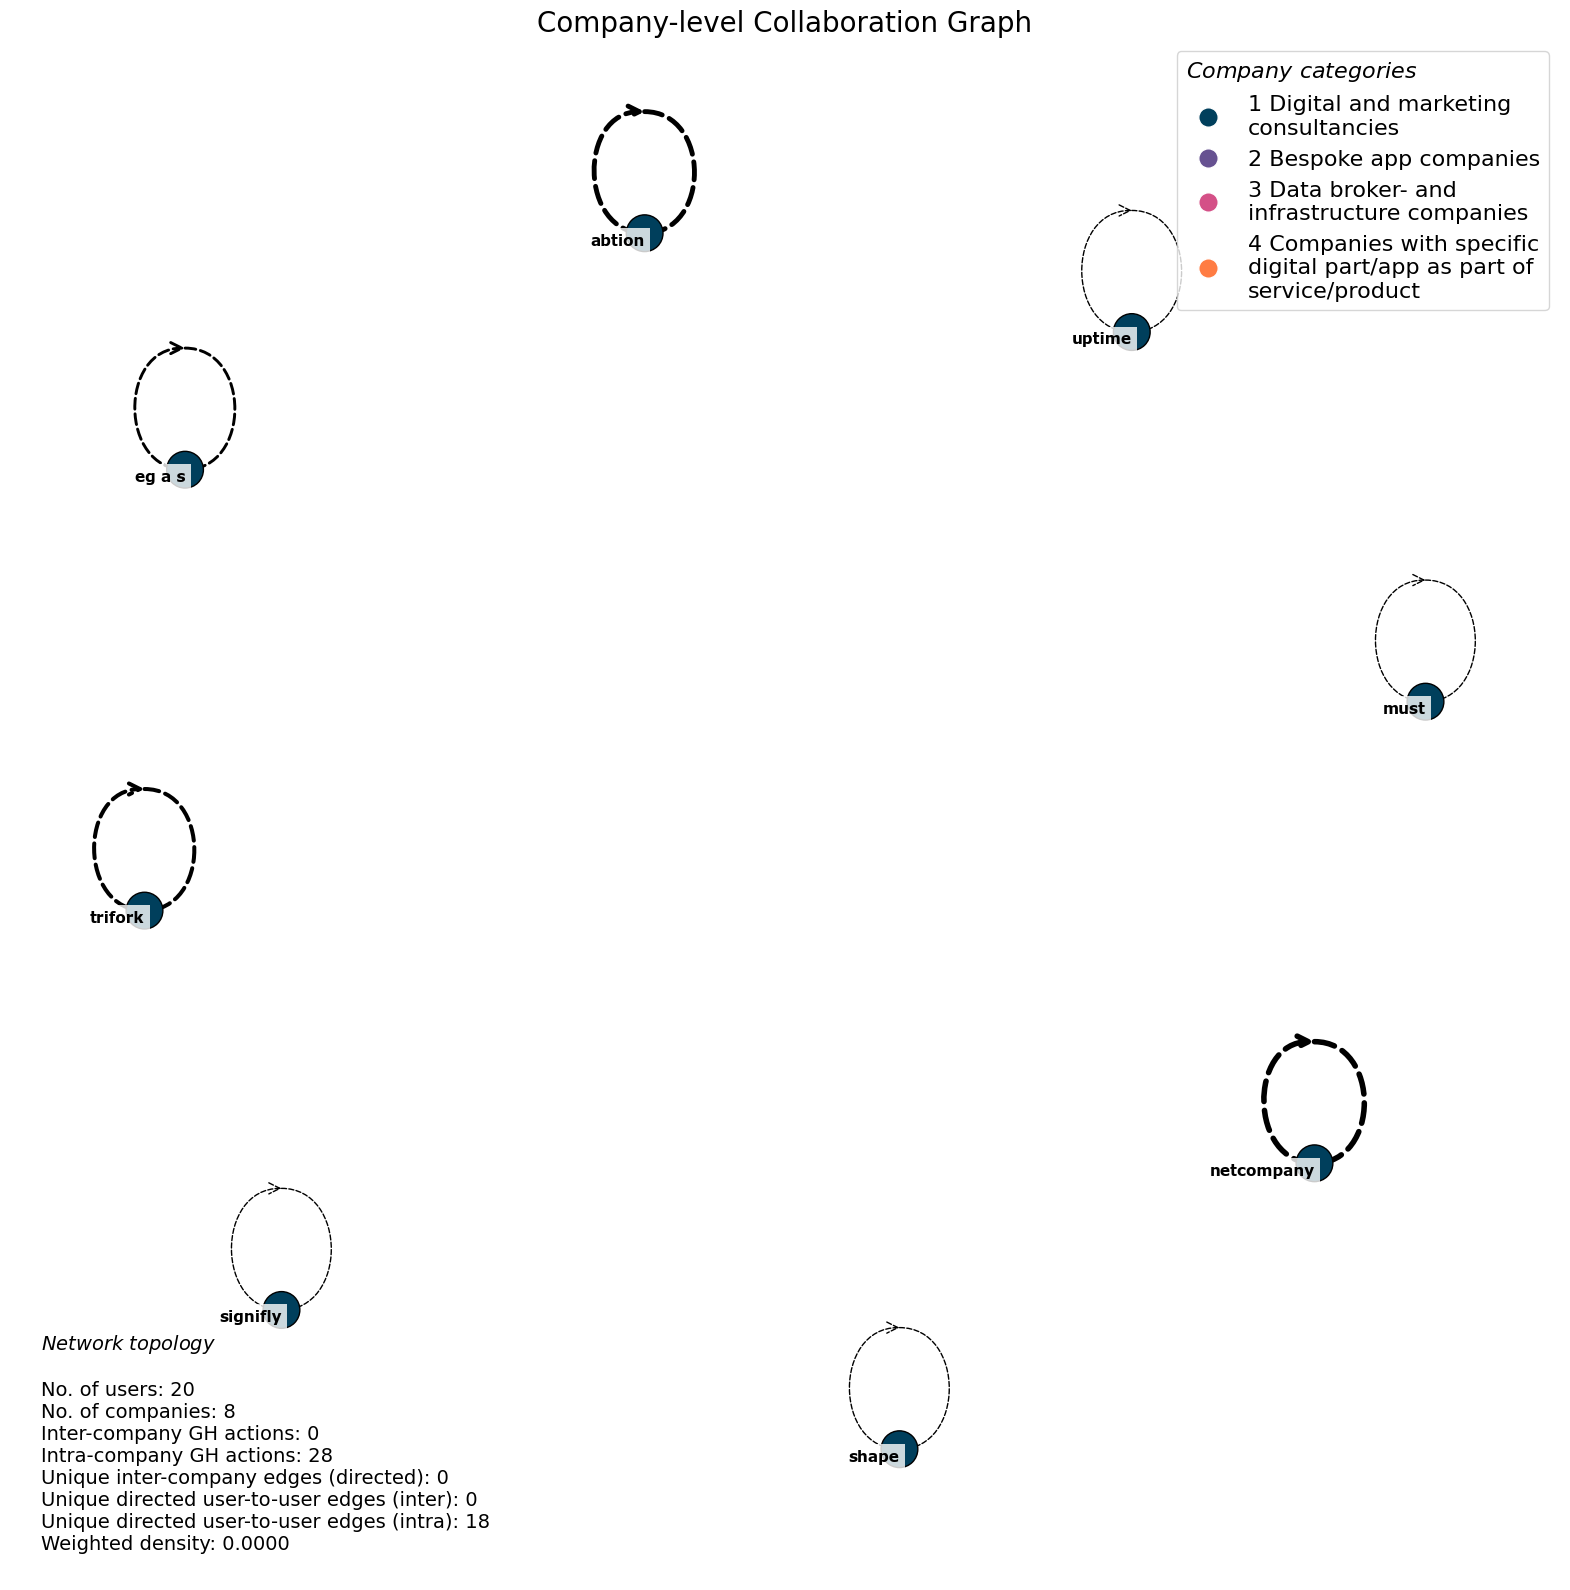

Plotting Attention Graph
Plot saved as attention_graph.png


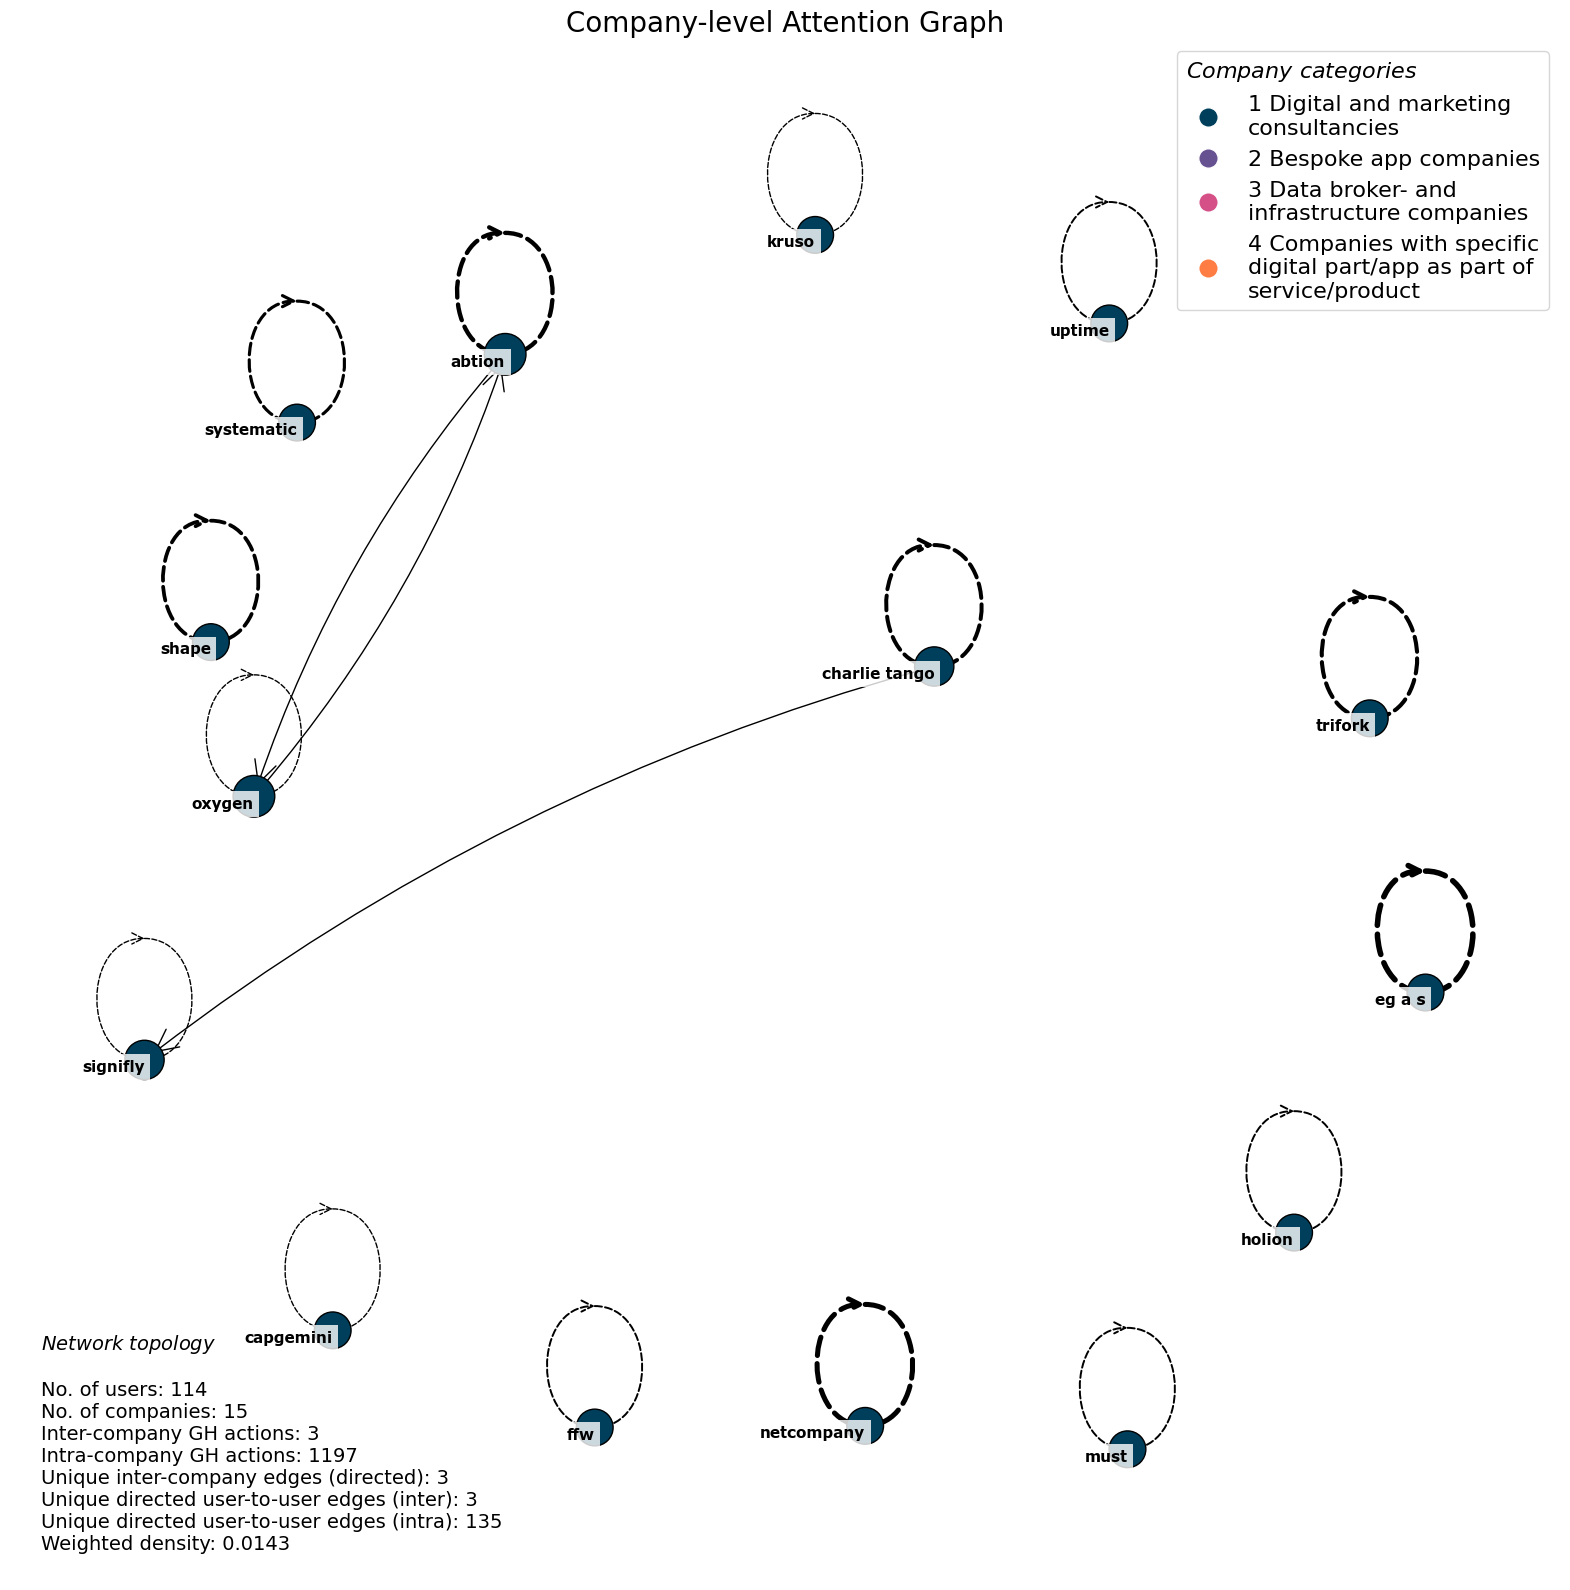

In [6]:
# Visualize and save Collaboration Graph
collab_viz = NetworkVisualizer(collaboration_graph, edgelist=all_edges_user_level, graph_type='collaboration')

print("Plotting Collaboration Graph")
fig_collab = collab_viz.create_plot(title="Company-level Collaboration Graph");
collab_viz.save_plot_as_png(fig_collab, 'collaboration_graph.png')
plt.show()

# Visualize and save Attention Graph
attention_viz = NetworkVisualizer(attention_graph, edgelist=all_edges_user_level, graph_type='attention')

print("Plotting Attention Graph")
fig_attention = attention_viz.create_plot(title="Company-level Attention Graph");
attention_viz.save_plot_as_png(fig_attention, 'attention_graph.png')
plt.show()
